In [67]:
import networkx as nx
G = nx.Graph()

In [135]:
with open("day_20_input_0.txt") as fname:
    map = fname.read().splitlines()
map

['###############',
 '#...#...#.....#',
 '#.#.#.#.#.###.#',
 '#S#...#.#.#...#',
 '#######.#.#.###',
 '#######.#.#...#',
 '#######.#.###.#',
 '###..E#...#...#',
 '###.#######.###',
 '#...###...#...#',
 '#.#####.#.###.#',
 '#.#...#.#.#...#',
 '#.#.#.#.#.#.###',
 '#...#...#...###',
 '###############']

In [71]:
maxcolumns = len(map[0])
maxrows = len(map)
print(maxcolumns,maxrows)

15 15


In [137]:
# get map into dictionary form
dictionary = {}

for y, line in enumerate(map):
    for x, char in enumerate(line):
        if x == 0 or y == 0 or x == maxcolumns-1 or y == maxrows-1:   # we don't need the edges/bounding box
            continue
        dictionary[(x,y)] = char

In [139]:
# find the start
x, y = [coord for coord in dictionary if dictionary[coord] == "S"][0]
start = (x,y)
print(start)

# find the end
x, y = [coord for coord in dictionary if dictionary[coord] == "E"][0]
end = (x,y)
print(end)

(1, 3)
(5, 7)


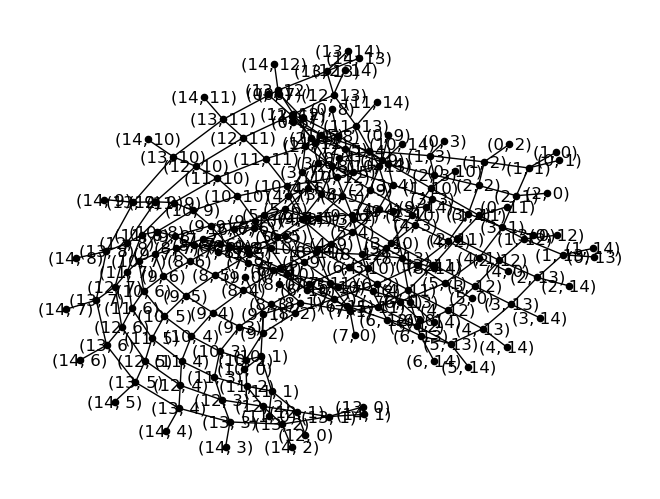

In [145]:
G.clear()

# make the full grid of edges
for row in range(1,maxrows-1):
    for col in range(1,maxcolumns-1):
        if row != 0:  # if not the very top row, make a connection between current node and the one above
            up_row = row - 1
            G.add_edge((row, col), (up_row, col))
        if row != (maxrows):  # if not the very bottom row, make a connection between current node and the one below
            down_row = row + 1
            G.add_edge((row, col), (down_row, col))
        if col != 0:  # if not the leftmost column, make a connection between current node and the one to the left
            left_col = col - 1
            G.add_edge((row, col), (row, left_col))
        if col != maxcolumns:  # if not the rightmost column, make a connection between current node and the one to the right
            right_col = col + 1
            G.add_edge((row, col), (row, right_col))

nx.draw_spring(G, with_labels=True, font_color="k", node_size=20, node_color="k")

In [147]:
G.remove_nodes_from([coord for coord in dictionary if dictionary[coord] == "#"])

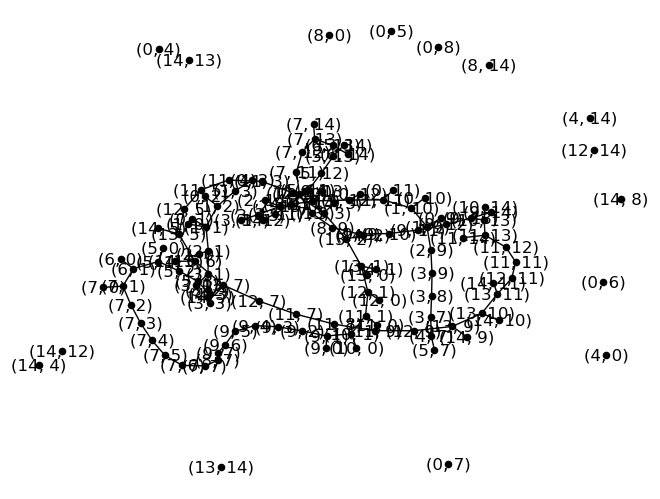

In [149]:
nx.draw_spring(G, with_labels=True, font_color="k", node_size=20, node_color="k")

In [151]:
nx.shortest_path_length(G, source=start, target=end)

84

In [153]:
for x,y in nx.shortest_path(G, source=start, target=end):
    dictionary[(x,y)] = "o"

In [157]:
# visualise
def print_map():
    for y in range(1,maxrows-1):
        string = ''
        for x in range(1,maxcolumns-1):
            string = string + dictionary[(x,y)]
        print(string)
print_map()

ooo#ooo#ooooo
o#o#o#o#o###o
o#ooo#o#o#ooo
######o#o#o##
######o#o#ooo
######o#o###o
##ooo#ooo#ooo
##o#######o##
ooo###ooo#ooo
o#####o#o###o
o#ooo#o#o#ooo
o#o#o#o#o#o##
ooo#ooo#ooo##


In [181]:
def add_edges_around_coord(coord):
    x, y = coord
    G.add_edge((x, y), (x+1, y))
    G.add_edge((x, y), (x, y+1))
    G.add_edge((x, y), (x-1, y))
    G.add_edge((x, y), (x, y-1))

In [197]:
normal_time = nx.shortest_path_length(G, source=start, target=end)
cheat_cutoff = 20
accumulator = 0

for coord in dictionary:
    if dictionary[coord] == "#":
        add_edges_around_coord(coord)
        time_saving = normal_time - nx.shortest_path_length(G, source=start, target=end)
        G.remove_node(coord)

        if time_saving > cheat_cutoff:
            accumulator += 1

accumulator

4

## Part 1

In [202]:
with open("day_20_input_1.txt") as fname:
    map = fname.read().splitlines()

maxcolumns = len(map[0])
maxrows = len(map)
print(maxcolumns,maxrows)

141 141


In [204]:
# get map into dictionary form
dictionary = {}

for y, line in enumerate(map):
    for x, char in enumerate(line):
        if x == 0 or y == 0 or x == maxcolumns-1 or y == maxrows-1:   # we don't need the edges/bounding box
            continue
        dictionary[(x,y)] = char

In [206]:
# find the start
x, y = [coord for coord in dictionary if dictionary[coord] == "S"][0]
start = (x,y)
print(start)

# find the end
x, y = [coord for coord in dictionary if dictionary[coord] == "E"][0]
end = (x,y)
print(end)

(31, 57)
(55, 61)


In [208]:
G.clear()

# make the full grid of edges
for row in range(1,maxrows-1):
    for col in range(1,maxcolumns-1):
        if row != 0:  # if not the very top row, make a connection between current node and the one above
            up_row = row - 1
            G.add_edge((row, col), (up_row, col))
        if row != (maxrows):  # if not the very bottom row, make a connection between current node and the one below
            down_row = row + 1
            G.add_edge((row, col), (down_row, col))
        if col != 0:  # if not the leftmost column, make a connection between current node and the one to the left
            left_col = col - 1
            G.add_edge((row, col), (row, left_col))
        if col != maxcolumns:  # if not the rightmost column, make a connection between current node and the one to the right
            right_col = col + 1
            G.add_edge((row, col), (row, right_col))

In [210]:
G.remove_nodes_from([coord for coord in dictionary if dictionary[coord] == "#"])

In [214]:
normal_time = nx.shortest_path_length(G, source=start, target=end)
cheat_cutoff = 100
accumulator = 0

for coord in dictionary:
    if dictionary[coord] == "#":
        add_edges_around_coord(coord)
        time_saving = normal_time - nx.shortest_path_length(G, source=start, target=end)
        G.remove_node(coord)

        if time_saving >= cheat_cutoff:
            accumulator += 1

accumulator

1499

## Part 2

In [219]:
length = dict(nx.all_pairs_shortest_path_length(G), cutoff=20)

In [ ]:
length

In [229]:
length[(2, 3)][(3, 0)]

4

In [233]:
for node_1 in G.nodes():
    for node_2 in G.nodes():
        if node_1 != node_2:
            if length[node_1][node_2] < 21:
                print(node_1, node_2)

KeyError: (1, 0)